<a href="https://colab.research.google.com/github/RgomezRo/capstone/blob/main/EDA_Balance_Alimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Balance de alimentos



##1. Importar el drive y las librerias y descargar el csv

###1.1. Importar drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


###1.2. Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import math
plt.style.use("ggplot")
from sklearn import model_selection 
from sklearn import metrics 

### 1.3. Descargar csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MÁSTER DATA SCIENC/DATA SCIENCE EJERCICIOS/CSV Huella de Carbono/Balances_Alimentos.csv", sep=",", index_col=0, encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


###1.4. Visualización del DataFrame

In [ ]:
df.head().T

Area Code,2,2,2,2,2
Area,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Item Code,2501,2501,2501,2501,2501
Item,Population,Population,Population,Population,Population
Element Code,511,511,511,511,511
Element,Total Population - Both sexes,Total Population - Both sexes,Total Population - Both sexes,Total Population - Both sexes,Total Population - Both sexes
Year Code,2010,2011,2012,2013,2014
Year,2010,2011,2012,2013,2014
Unit,1000 persons,1000 persons,1000 persons,1000 persons,1000 persons
Value,29186.0,30117.0,31161.0,32270.0,33371.0
Flag,*,*,*,*,*


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321550 entries, 2 to 5817
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area          object 
 1   Item Code     int64  
 2   Item          object 
 3   Element Code  int64  
 4   Element       object 
 5   Year Code     int64  
 6   Year          int64  
 7   Unit          object 
 8   Value         float64
 9   Flag          object 
dtypes: float64(1), int64(4), object(5)
memory usage: 278.8+ MB


## 2. Data Understanding

###2.1. Análisis univariante de datos

2.1.1. Distibución de los valores TARGET

In [ ]:
TARGET="Value"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01223381d0>]],
      dtype=object)

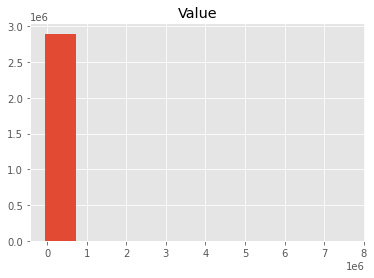

In [ ]:
df.hist(column="Value")

2.1.2. Distribución de las variables independientes

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="uint8") and len(dataset[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="uint8") and len(dataset[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (dataset[i].dtype=="object")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

lista_numericas,lista_boolean,lista_categoricas=obtener_lista_variables(df)

Numéricas

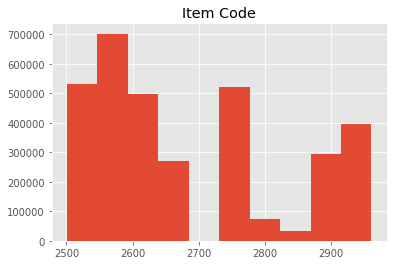

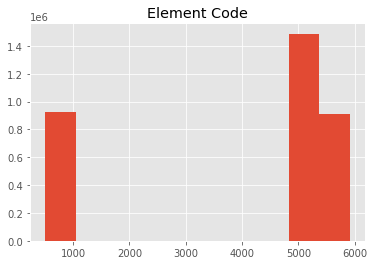

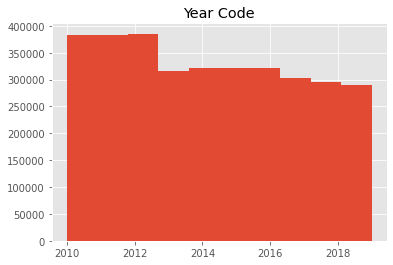

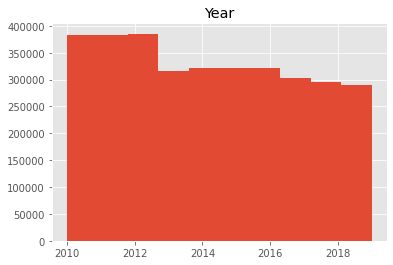

In [ ]:
for i in lista_numericas:
  df.hist(column=i)

Categóricas

In [ ]:
for i in lista_categoricas:
  print(i, df[i].unique(), "\n")

Area ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 

##3. Data Preparation

In [ ]:
df.isnull().sum()

Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           423617
Flag            316949
dtype: int64

In [ ]:
del(df["Flag"])

In [ ]:
df["Value"].fillna(df["Value"].mean(), inplace=True)

##4. Visualización Porcentaje Emisiones GEI

###4.1. Gráfico de barras horizontales

Balance de Alimentos mundial

In [ ]:
df_ultimo_año = df[df["Year"]==max(df["Year"])].reset_index(drop=True)

In [ ]:
df_ultimo_año = df_ultimo_año[ (df_ultimo_año["Element"]=="Total Population - Both sexes") &  (df_ultimo_año["Item"]=='Population')]
df_ultimo_año_area = df_ultimo_año.groupby("Area")[[TARGET]].sum().reset_index()
df_ultimo_año_area

,Area,Value
0,Afghanistan,38042.0
1,Africa,1274964.0
2,Albania,2881.0
3,Algeria,43053.0
4,Americas,1009951.0
...,...,...
208,Western Europe,195445.0
209,World,7642622.0
210,Yemen,29162.0
211,Zambia,17861.0


In [ ]:
tabla_orden = df_ultimo_año_area.sort_values("Value",ascending=True).tail(20).reset_index(drop=True)
tabla_orden

,Area,Value
0,Northern America,366476.0
1,Western Africa,391434.0
2,Eastern Africa,402749.0
3,South America,426906.0
4,European Union (27),444987.0
5,Land Locked Developing Countries,509148.0
6,South-eastern Asia,655775.0
7,Europe,746653.0
8,Least Developed Countries,1002612.0
9,Americas,1009951.0


In [ ]:
fig = px.bar(tabla_orden, x="Value", y="Area", title="Balance de Alimentos por Área", text="Value", orientation="h", width=700, height=700, range_x =[0, max(df_ultimo_año_area["Value"])+10000000])

fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")

Conclusiones:

1. El balance de alimentos mundial es de 7.642.622 (mil toneladas)
2. Los continentes que tienen un balance superior de alimentos son Asia, America y Europa. Coinciden con los de emiten más gases GEI. 
3. Los países que tienen un balance superior de alimentos son China y India

####Balance de Alimentos por producto

In [ ]:
df_ultimo_año = df[df["Year"]==max(df["Year"])].reset_index(drop=True)

In [ ]:
df_ultimo_año_producto = df_ultimo_año.groupby("Item")[["Value"]].sum().reset_index()
df_ultimo_año_producto

,Item,Value
0,"Alcohol, Non-Food",3.099760e+05
1,Alcoholic Beverages,4.395614e+06
2,Animal Products,1.374982e+05
3,Animal fats,5.282942e+05
4,Apples and products,1.371466e+06
...,...,...
115,"Vegetables, Other",1.489150e+07
116,Vegetal Products,5.163452e+05
117,Wheat and products,1.283910e+07
118,Wine,4.758167e+05


In [ ]:
tabla_orden = df_ultimo_año_producto.sort_values("Value",ascending=True).tail(20).reset_index(drop=True)
tabla_orden

,Item,Value
0,Sugar & Sweeteners,4.225277e+06
1,Alcoholic Beverages,4.395614e+06
2,Palm kernels,5.034026e+06
3,Meat,5.131197e+06
4,Cassava and products,5.146967e+06
5,Potatoes and products,5.689310e+06
6,Soyabeans,5.732795e+06
7,Fruits - Excluding Wine,1.211971e+07
8,Rice (Milled Equivalent),1.213034e+07
9,Wheat and products,1.283910e+07


In [ ]:
fig = px.bar(tabla_orden, x="Value", y="Item", title="Balance de Alimentos por Producto", text="Value", orientation="h", width=700, height=700, range_x =[0, max(df_ultimo_año_area["Value"])+10000000])

fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")

Conclusiones:

1. Los cultivos que más se producen en el mundo són los cereales (excluyendo la cebada), los cultivos de azucar y los vegetales 
2. Los alimentos que más se producen en el mundo son la caña de azucar, la leche (excluyendo la manteca) y el maiz

####Balance de Alimentos por Elemento

In [ ]:
df_ultimo_año = df[df["Year"]==max(df["Year"])].reset_index(drop=True)

In [ ]:
df_ultimo_año_elemento = df_ultimo_año.groupby("Element")[["Value"]].sum().reset_index()
df_ultimo_año_elemento

,Element,Value
0,Domestic supply quantity,1.080478e+08
1,Export Quantity,1.387310e+07
2,Fat supply quantity (g/capita/day),7.745255e+04
3,Feed,1.321091e+07
4,Food,5.327286e+07
5,Food supply (kcal/capita/day),2.467763e+06
6,Food supply quantity (kg/capita/yr),2.931279e+05
7,Import Quantity,1.405737e+07
8,Losses,5.818286e+06
9,Other uses (non-food),7.996064e+06


In [ ]:
tabla_orden = df_ultimo_año_elemento.sort_values("Value",ascending=True).tail(20).reset_index(drop=True)
tabla_orden

,Element,Value
0,Residuals,-1.926400e+04
1,Tourist consumption,1.977100e+04
2,Protein supply quantity (g/capita/day),6.974889e+04
3,Fat supply quantity (g/capita/day),7.745255e+04
4,Food supply quantity (kg/capita/yr),2.931279e+05
5,Stock Variation,9.469043e+05
6,Seed,1.554023e+06
7,Food supply (kcal/capita/day),2.467763e+06
8,Losses,5.818286e+06
9,Other uses (non-food),7.996064e+06


In [ ]:
fig = px.bar(tabla_orden, x="Value", y="Element", title="Balance de Alimentos por Elemento", text="Value", orientation="h", width=700, height=700, range_x =[0, max(df_ultimo_año_area["Value"])+10000000])

fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")

Conclusiones:

1. La producción mundial de alimentos es de 108.792.161 (1000 toneladas)
2. La comida producida es de 53.272.862 (1000 toneladas) de una población total de 38.236.004 (1000 personas), de la cual 26.315.753 (1000 toneladas) son alimentos procesados

###4.2. Gráfico evolutivo lineal

####Evolutivo Balance de Alimentos por Area

In [ ]:
evolutivo_lineas_Area = df.groupby(["Area","Year"])["Value"].sum().reset_index().sort_values("Value",ascending=False)

evolutivo_lineas_Area 

,Area,Year,Value
2096,World,2019,8.281139e+07
2095,World,2018,8.185325e+07
2094,World,2017,8.113998e+07
2093,World,2016,7.930666e+07
2092,World,2015,7.796261e+07
...,...,...,...
69,Antigua and Barbuda,2019,1.251386e+04
795,Grenada,2019,1.240118e+04
1836,Sudan (former),2011,4.759400e+02
1835,Sudan (former),2010,4.690200e+02


In [ ]:
evolutivo_lineas_Area.sort_values("Year", inplace=True)

In [ ]:
px.line(evolutivo_lineas_Area,x="Year",y="Value",color="Area",title="Evolutivo Balance Alimentos por Área")

####Evolutivo Balance de Alimentos por Producto

In [ ]:
evolutivo_lineas_Producto = df.groupby(["Item","Year"])["Value"].sum().reset_index().sort_values("Year",ascending=False)

evolutivo_lineas_Producto 

,Item,Year,Value
189,Cereals - Excluding Beer,2019,4.737368e+07
187,Cereals - Excluding Beer,2017,4.697591e+07
188,Cereals - Excluding Beer,2018,4.655922e+07
186,Cereals - Excluding Beer,2016,4.605155e+07
185,Cereals - Excluding Beer,2015,4.471304e+07
...,...,...,...
526,"Meat, Aquatic Mammals",2016,0.000000e+00
525,"Meat, Aquatic Mammals",2015,0.000000e+00
524,"Meat, Aquatic Mammals",2014,0.000000e+00
523,"Meat, Aquatic Mammals",2013,0.000000e+00


In [ ]:
evolutivo_lineas_Area.sort_values("Year", inplace=True)

In [ ]:
px.line(evolutivo_lineas_Producto,x="Year",y="Value",color="Item",title="Evolutivo Balance Alimentos por Producto")

Conclusiones:

1. A partir del 2012, la evolución de la producción de los cereales crece más que en el resto de los alimentos 

####Evolutivo Balance de Alimentos por Elemento

In [ ]:
evolutivo_lineas_Elemento = df.groupby(["Element","Year"])["Value"].sum().reset_index().sort_values("Year",ascending=False)

evolutivo_lineas_Producto

,Item,Year,Value
189,Cereals - Excluding Beer,2019,4.737368e+07
187,Cereals - Excluding Beer,2017,4.697591e+07
188,Cereals - Excluding Beer,2018,4.655922e+07
186,Cereals - Excluding Beer,2016,4.605155e+07
185,Cereals - Excluding Beer,2015,4.471304e+07
...,...,...,...
526,"Meat, Aquatic Mammals",2016,0.000000e+00
525,"Meat, Aquatic Mammals",2015,0.000000e+00
524,"Meat, Aquatic Mammals",2014,0.000000e+00
523,"Meat, Aquatic Mammals",2013,0.000000e+00


In [ ]:
evolutivo_lineas_Area.sort_values("Year", inplace=True)

In [ ]:
px.line(evolutivo_lineas_Elemento,x="Year",y="Value",color="Element",title="Evolutivo Balance Alimentos por Elemento")